In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Définition de nos variables modifiable (matrice d'adjacence...)

In [2]:
Types = {'electrique': 1000, 'thermique':2424}

Types_vitesseslimit = {'electrique': 200, 'thermique':150}

Types_perc = {'electrique': 0.5, 'thermique':0.5}

In [3]:
ville_1m = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1] ,
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]] 

# Les fonctions 

In [4]:
def ville_graphe(ville_m,lenmin,lenmax):
    """ Retourn le graphe de la ville à partir de la matrice d'adjacence. ville_m = matrice, lenmin = longueur min des routes,
    lenmax = longueur max des route. Tire aléatoirement la longueur des routes. On suppose que les routes n'ont pas de sens.   
    """
    i = len(ville_m)
    ville_graph = nx.Graph()
    ville_graph.add_nodes_from(range(i))
    ville_graph.add_edges_from([(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1])
    for k in range(i-1):
        L= [(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1]
        for a,b in L : 
             ville_graph.add_edge(a,b, len = random.randint(lenmin,lenmax))
    pos = nx.spring_layout(ville_graph)
    nx.draw_networkx_edges(ville_graph,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    nx.draw_networkx_edge_labels(ville_graph, pos)
    nx.draw(ville_graph, pos, with_labels=True)
    return ville_graph

In [5]:
def random_position(len_ville_1m):
    """ Retourne la valeur du node de départ et celui d'arrivée de manière aléatoire. len_ville_1m = nb_colonne matrice"""
    depart = random.randint(0,len_ville_1m -1)
    arrivee = random.randint(0,len_ville_1m -1)
    
    while(depart == arrivee):
        arrivee = random.randint(0,len_ville_1m -1)
    return (depart, arrivee)

In [6]:
class Voiture:
    """ Création d'une voiture avec ses différents parametres"""
    nbr_voiture = 0
    def __init__(self,typee,positiondepart,positionarrivé,positionactuelle,vitesse,vitesse_max,villeg):
        self.type = typee
        self.speed = vitesse 
        """position est un tuple d'un tuple de position et d'un pourcentage """
        self.position = positionactuelle
        self.positiondepart = positiondepart
        self.positionarrivé = positionarrivé
        self.vitesse_max =vitesse_max
        "chemin le plus cours a"
        self.chemin = nx.shortest_path(villeg, source=positiondepart, target=positionarrivé, weight='len', method='dijkstra')
        Voiture.nbr_voiture += 1
    def spawn(typesperc,nbr,villem,villeg):
        """ création de la population de voitures en prenant en compte le pourcentage de voitures éléctriques et terminques"""
        system=[]
        len_ville_1m = len(villem)
        for i in range(round(nbr*typesperc['electrique'])):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            
            
            a = nx.shortest_path(villeg, source=depart, target=arrivee, weight='len', method='dijkstra')
            
            system.append("voiture"+str(i+1))
            system[i]= Voiture('electrique',depart,arrivee,((depart,a[1]),0.0),50,Types_vitesseslimit['electrique'],villeg)
        
        for j in range(round(nbr*typesperc['thermique']), nbr):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            
            b = nx.shortest_path(villeg, source=depart, target=arrivee, weight='len', method='dijkstra')
        
            system.append("voiture"+str(j+1))
            system[j]= Voiture('thermique',depart,arrivee,((depart,b[1]),0.0),50,Types_vitesseslimit['thermique'],villeg)
        return system

In [7]:
def liste2tuple(chemin_liste):
    """ transforme une liste en tuple. Permet d'afficher le chemin sous forme de plusieurs tuples.
    chemin liste = liste du plus court chemin enregistré dans voiture.chemin"""
    chemin_tuple = []
    for i in range(len(chemin_liste)-1):
        chemin_tuple.append((chemin_liste[i],chemin_liste[i+1]))
    return chemin_tuple

In [8]:
def indice_chemin(chemin , tuplee):
    """ retourn l'indice du tuple (position) dans le chemin sous forme de liste de tuples. chemin = liste de tuples, 
    tuplee = le tuple / arrete à trouver"""
    for i in range(len(chemin)-1):
        if chemin[i]==tuplee:
            return i
    return 0 

In [9]:
def donne_longueur(tuple1):
    """ Retourn la longueur entre deux nodes reliés entre eux. """
    length = nx.get_edge_attributes(ville_1g,'len')
    for (tuple2,l) in length.items():
        if((tuple1[0]==tuple2[0]) and (tuple1[1]==tuple2[1])) or ((tuple1[0]==tuple2[1] )and (tuple1[1]==tuple2[0])) :
            return l
    return -1 

In [10]:
def change_distance(voiture,verbose=True):
    """ Cette fonction permet de deplacer une voiture pendant 10s. Elle modifie les parametres de la voiture :
    pourcentage de la distance parcouru sur une arrete, changement de node quand on arrive à la fin de l'arrete
    et ajout de la distance parcouru sur la nouvelle arrete"""
    
    chemin_liste = voiture.chemin
    chemin = liste2tuple(chemin_liste)
    
    distance_parcouru =(voiture.speed*10)/3600
    if voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0]) > 100:
        if voiture.position[0][1]== voiture.positionarrivé:
            voiture.speed=0
            voiture.position=(voiture.position[0],100)
        else:
            if verbose:
                print()
                print("changement d'arrete " + "passage de " +str(chemin[indice_chemin(chemin,voiture.position[0]) - 1]) + " à :" + str(voiture.position[0]))
                print()
            voiture.position = (chemin[indice_chemin(chemin,voiture.position[0]) + 1],0)
        
    
    if voiture.position[1]<100 and voiture.speed!= 0:
        voiture.position = (voiture.position[0],voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0]))  

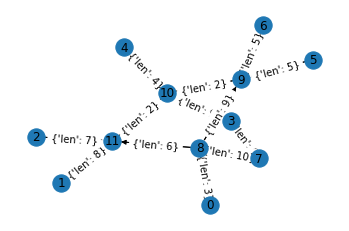

In [11]:
ville_1g = ville_graphe(ville_1m,2,10)

In [12]:
def init_dico_edge(villeg):
    """ initialise le dico des toutes les edges du graph """
    dic = nx.get_edge_attributes(villeg,'len')
    for edge in dic:
        dic[edge]=0
    return dic

 ###  compter les voiture passer sur chaque edge a la fin de la simu c'est simple mais le mieux est en temps reel.
 

In [13]:
def nb_voiture_edge_temp_reel(population):
    """ cette fonction compte le nombre de voiture sur chaque edge à chaque instant (10s)"""
    popu = [v.position[0] for v in population]
    compte ={}
    for valeur1, valeur2 in popu:
        compte[(valeur1,valeur2)]= popu.count((valeur1,valeur2)) + popu.count((valeur2,valeur1))
    return compte

# Fonction de simulation finale

In [14]:
def simulation(nbrvoiture, villem, villeg, lenmin, lenmax, verbose=True):
    dictroute = nx.get_edge_attributes(villeg,'len')
    popu = Voiture.spawn(Types_perc,nbrvoiture,villem,villeg)
    restant = []
    if verbose==True:
        print(dictroute)
        for j in popu:
            print(j.chemin)
    for i in range(1000):
        for v in range(len(popu)):
            change_distance(popu[v])
            if popu[v].position[1]==100 and popu[v] not in restant:
                restant.append(popu[v])
            if verbose:
                print("voiture : " + str(v) + " pourcentage = "+ str(popu[v].position[1]) + " tuple pos = " + str(popu[v].position[0]) + " chemin est " + str(popu[v].chemin))
        print("nombre de voiture sur chaques arretes : " + str(nb_voiture_edge_temp_reel(popu)))
        print()
        if len(restant)==nbrvoiture:
            if verbose:
                print("Toutes les voitures sont arrivées")
            break 


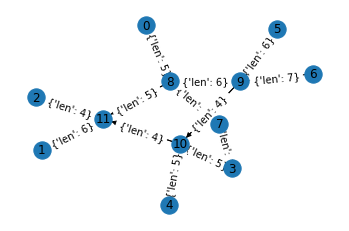

In [15]:
ville_1g = ville_graphe(ville_1m,2,10)

In [16]:
simulation(40,ville_1m,ville_1g,2,10,True)

{(0, 8): 5, (1, 11): 6, (2, 11): 4, (3, 7): 4, (3, 10): 5, (4, 10): 5, (5, 9): 6, (6, 9): 7, (7, 8): 2, (8, 9): 6, (8, 11): 5, (9, 10): 4, (10, 11): 4}
[8, 9, 5]
[8, 9, 6]
[11, 8, 7]
[8, 11, 10, 4]
[8, 11]
[11, 10, 9, 6]
[9, 5]
[6, 9]
[1, 11, 10, 4]
[3, 10, 11, 1]
[11, 1]
[0, 8, 11, 2]
[10, 11, 8, 0]
[3, 10, 11]
[4, 10, 9, 5]
[6, 9, 10, 11, 2]
[11, 10, 3]
[10, 4]
[0, 8, 11, 2]
[6, 9, 10, 4]
[5, 9, 10, 11]
[1, 11, 8]
[5, 9, 10, 4]
[7, 8, 9, 5]
[5, 9, 10, 4]
[1, 11]
[3, 10, 11]
[9, 6]
[8, 0]
[5, 9, 10, 11, 2]
[4, 10, 9]
[2, 11, 10, 9, 6]
[6, 9, 10]
[2, 11, 8, 7]
[7, 8, 11, 2]
[11, 8]
[2, 11, 10, 4]
[9, 10, 3]
[2, 11, 8]
[2, 11, 10, 9]
voiture : 0 pourcentage = 2.314814814814815 tuple pos = (8, 9) chemin est [8, 9, 5]
voiture : 1 pourcentage = 2.314814814814815 tuple pos = (8, 9) chemin est [8, 9, 6]
voiture : 2 pourcentage = 2.7777777777777777 tuple pos = (11, 8) chemin est [11, 8, 7]
voiture : 3 pourcentage = 2.7777777777777777 tuple pos = (8, 11) chemin est [8, 11, 10, 4]
voiture : 4 p

voiture : 19 pourcentage = 69.44444444444451 tuple pos = (6, 9) chemin est [6, 9, 10, 4]
voiture : 20 pourcentage = 81.01851851851852 tuple pos = (5, 9) chemin est [5, 9, 10, 11]
voiture : 21 pourcentage = 81.01851851851852 tuple pos = (1, 11) chemin est [1, 11, 8]
voiture : 22 pourcentage = 81.01851851851852 tuple pos = (5, 9) chemin est [5, 9, 10, 4]
voiture : 23 pourcentage = 48.611111111111136 tuple pos = (8, 9) chemin est [7, 8, 9, 5]
voiture : 24 pourcentage = 81.01851851851852 tuple pos = (5, 9) chemin est [5, 9, 10, 4]
voiture : 25 pourcentage = 81.01851851851852 tuple pos = (1, 11) chemin est [1, 11]
voiture : 26 pourcentage = 97.22222222222216 tuple pos = (3, 10) chemin est [3, 10, 11]
voiture : 27 pourcentage = 69.44444444444451 tuple pos = (9, 6) chemin est [9, 6]
voiture : 28 pourcentage = 97.22222222222216 tuple pos = (8, 0) chemin est [8, 0]
voiture : 29 pourcentage = 81.01851851851852 tuple pos = (5, 9) chemin est [5, 9, 10, 11, 2]
voiture : 30 pourcentage = 97.22222222

voiture : 7 pourcentage = 100 tuple pos = (6, 9) chemin est [6, 9]
voiture : 8 pourcentage = 79.86111111111113 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 9 pourcentage = 4.62962962962963 tuple pos = (11, 1) chemin est [3, 10, 11, 1]
voiture : 10 pourcentage = 100 tuple pos = (11, 1) chemin est [11, 1]
voiture : 11 pourcentage = 83.3333333333333 tuple pos = (8, 11) chemin est [0, 8, 11, 2]
voiture : 12 pourcentage = 5.555555555555555 tuple pos = (8, 0) chemin est [10, 11, 8, 0]
voiture : 13 pourcentage = 100 tuple pos = (10, 11) chemin est [3, 10, 11]
voiture : 14 pourcentage = 4.62962962962963 tuple pos = (9, 5) chemin est [4, 10, 9, 5]
voiture : 15 pourcentage = 55.55555555555555 tuple pos = (9, 10) chemin est [6, 9, 10, 11, 2]
voiture : 16 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 17 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 18 pourcentage = 83.3333333333333 tuple pos = (8, 11) chemin est [0, 8, 11, 2]
voiture : 19 p

voiture : 30 pourcentage = 100 tuple pos = (10, 9) chemin est [4, 10, 9]
voiture : 31 pourcentage = 33.730158730158735 tuple pos = (9, 6) chemin est [2, 11, 10, 9, 6]
voiture : 32 pourcentage = 100 tuple pos = (9, 10) chemin est [6, 9, 10]
voiture : 33 pourcentage = 100 tuple pos = (8, 7) chemin est [2, 11, 8, 7]
voiture : 34 pourcentage = 100 tuple pos = (11, 2) chemin est [7, 8, 11, 2]
voiture : 35 pourcentage = 100 tuple pos = (11, 8) chemin est [11, 8]
voiture : 36 pourcentage = 100 tuple pos = (10, 4) chemin est [2, 11, 10, 4]
voiture : 37 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 38 pourcentage = 100 tuple pos = (11, 8) chemin est [2, 11, 8]
voiture : 39 pourcentage = 100 tuple pos = (10, 9) chemin est [2, 11, 10, 9]
nombre de voiture sur chaques arretes : {(9, 5): 4, (9, 6): 5, (8, 7): 2, (10, 4): 7, (8, 11): 4, (6, 9): 5, (11, 1): 3, (11, 2): 4, (8, 0): 2, (10, 11): 4, (10, 3): 2, (11, 8): 4, (1, 11): 3, (10, 9): 3, (9, 10): 3}

voiture : 0 pourcenta

il nous reste à 
- faire les affichages ( couleur sur graph)
- randomiser les trajets ( avec parametre de pourcentage ) 
- creer des exemples en modifiant la route ( une route en plus creer t'il plus de bouchon
- calculer les emissions co2
- si le temps gerer les colisions en accelerant et en ralentissant 
- et plein d autre trucs